In [19]:
library(class)
library(caret)
library(pROC)

In [28]:
data(iris)

index = createDataPartition(iris$Species, p = 0.8, list = FALSE)
train_data = iris[index, ]
test_data = iris[-index, ]

x_train = train_data[, -5]
y_train = train_data$Species
x_test = test_data[, -5]
y_test = test_data$Species

k = 1
pred_knn = knn(train = x_train, test = x_test, cl = y_train, k = k)

accuracy = mean(pred_knn == y_test)

accuracy

[1] 1

In [29]:
conf_matrix = confusionMatrix(pred_knn, y_test)
conf_matrix

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

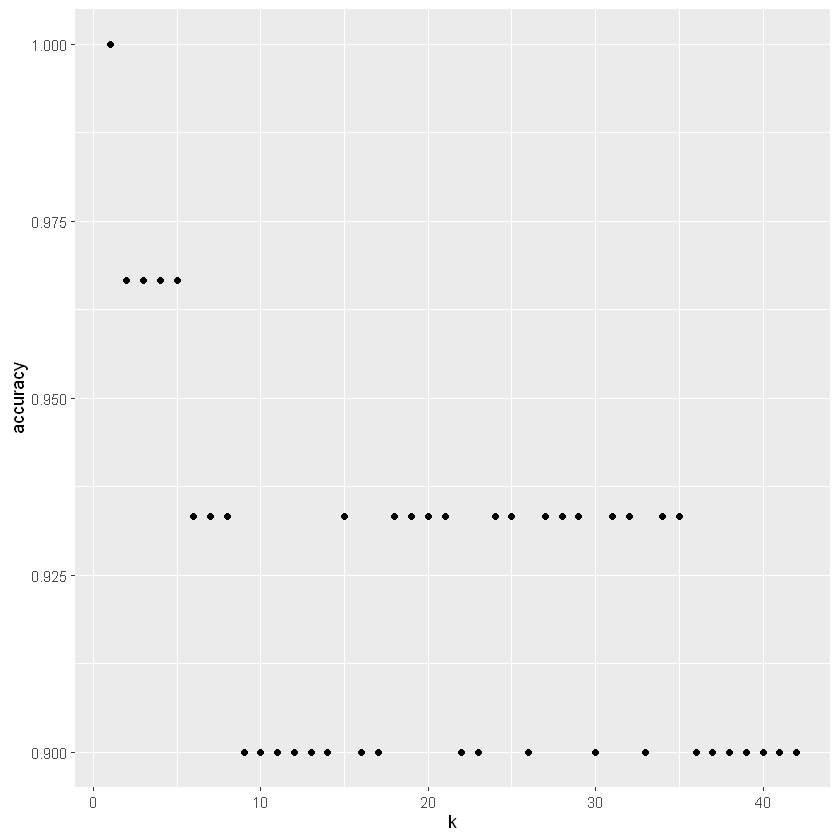

In [43]:
acc_results = data.frame(k = integer(), accuracy = numeric())
for (k in 1:42){
    pred = knn(train = x_train, test = x_test, cl = y_train, k = k)
    acc = mean(pred == y_test)
    acc_results = rbind(acc_results, data.frame(k = k, accuracy = acc))
}

ggplot(acc_results, aes(x = k, y = accuracy)) + geom_point()

<span style="color: blue"> Optimal k is 1 <span>

In [53]:
probs = knn(train = x_train, test = x_test, cl = y_train, k = k)

roc_setosa = multiclass.roc(ifelse(y_test == "setosa", 1, 0), probs)

plot(roc_setosa, col = "red", main = "ROC Curves for Iris kNN")
plot(roc_versicolor, col = "green", add = TRUE)
plot(roc_virginica, col = "blue", add = TRUE)
legend("bottomright", legend = c("Setosa", "Versicolor", "Virginica"),
       col = c("red", "green", "blue"), lwd = 2)

auc_setosa = auc(roc_setosa)
auc_versicolor = auc(roc_versicolor)
auc_virginica = auc(roc_virginica)

print(paste("AUC Setosa:", auc_setosa))
print(paste("AUC Versicolor:", auc_versicolor))
print(paste("AUC Virginica:", auc_virginica))

ERROR: Error in roc.default(response, predictor, levels = X, percent = percent, : Predictor must be numeric or ordered.


In [54]:
?multiclass.roc

multiclass.roc {pROC},R Documentation
response,"a factor, numeric or character vector of responses (true class), typically encoded with 0 (controls) and 1 (cases), as in roc."
predictor,"either a numeric vector, containing the value of each observation, as in roc, or, a matrix giving the decision value (e.g. probability) for each class."
formula,a formula of the type response~predictor.
data,a matrix or data.frame containing the variables in the formula. See model.frame for more details.
levels,"the value of the response for controls and cases respectively. In contrast with levels argument to roc, all the levels are used and combined to compute the multiclass AUC."
percent,"if the sensitivities, specificities and AUC must be given in percent (TRUE) or in fraction (FALSE, default)."
direction,in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).
...,further arguments passed to roc.
auc,"if called with auc=TRUE, a numeric of class “auc” as defined in auc. Note that this is not the standard AUC but the multi-class AUC as defined by Hand and Till."
ci,"if called with ci=TRUE, a numeric of class “ci” as defined in ci."
